 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
whale_returns_data.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_data.dropna(inplace=True)
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_data = algo_returns_data.dropna()
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_data = pd.read_csv(sp500_history_csv, parse_dates = True, infer_datetime_format = True, index_col='Date')
sp500_history_data.sort_index(inplace=True)


In [9]:
# Check Data Types
sp500_history_data.dtypes
print(sp500_history_data.dtypes)

Close    object
dtype: object


In [10]:
# Fix Data Types
#to remove dollar signs
sp500_history_data['Close'] = sp500_history_data['Close'].str.replace('$',"")
sp500_history_data['Close'] = sp500_history_data['Close'].astype('float')
sp500_history_data['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_data.pct_change()
sp500_daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
columns = ['S&P 500']
sp500_daily_returns.columns = columns
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
joined_data = pd.concat([sp500_daily_returns, whale_returns_data, algo_returns_data], axis="columns", join="inner")
joined_data

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-16,0.000509,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-18,0.001579,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

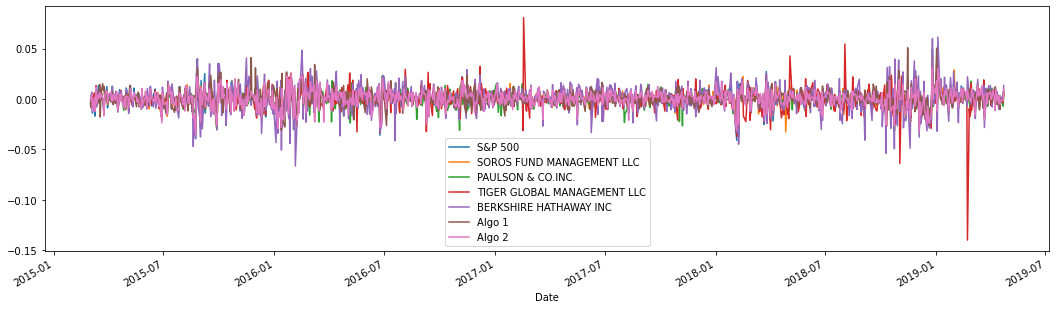

In [15]:
# Plot daily returns
joined_data.plot(figsize=(18,5))

#FIX SIZE

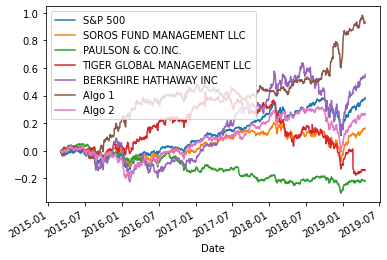

In [16]:
# Plot cumulative returns


cumulative_returns = (1 + joined_data).cumprod()-1
cumulative_returns.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

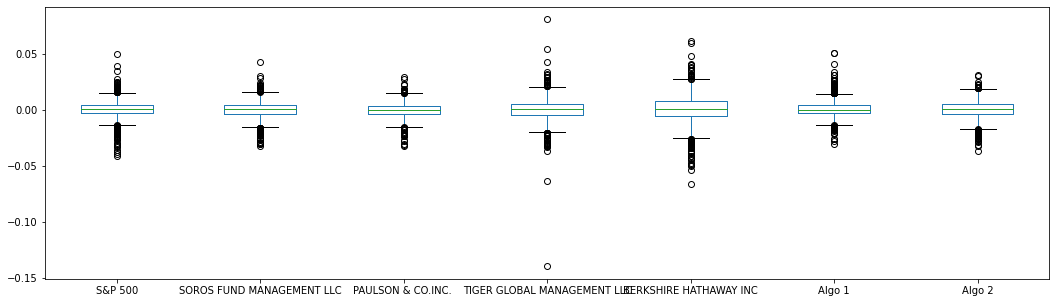

In [17]:
# Box plot to visually show risk
joined_data.plot.box(figsize=(18,5))


In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
all_std = joined_data.std()
all_std.head(10)

S&P 500                        0.008554
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
all_std > (all_std["S&P 500"])

S&P 500                        False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
all_std_annual = joined_data.std() * np.sqrt(252)
all_std_annual

S&P 500                        0.135786
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

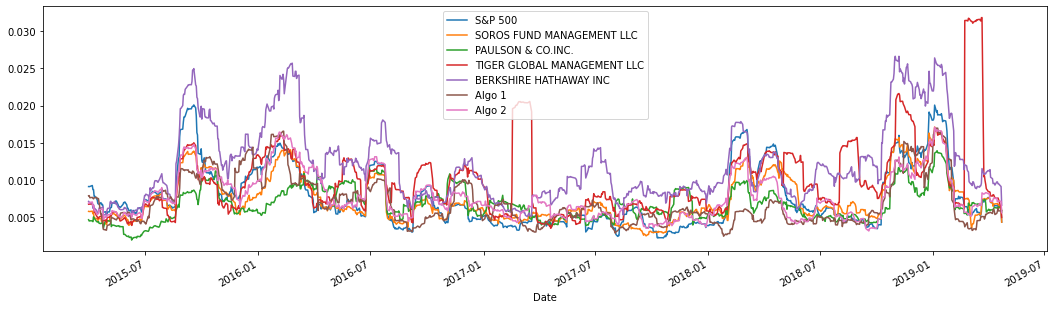

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

joined_data.rolling(window=21).std().plot(figsize=(18,5))

In [22]:
# Construct a correlation table
correlation = joined_data.corr()
correlation.head(7)


,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
S&P 500,1.000000,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764
SOROS FUND MANAGEMENT LLC,0.837864,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.669732,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.751371,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.279494,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.858764,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


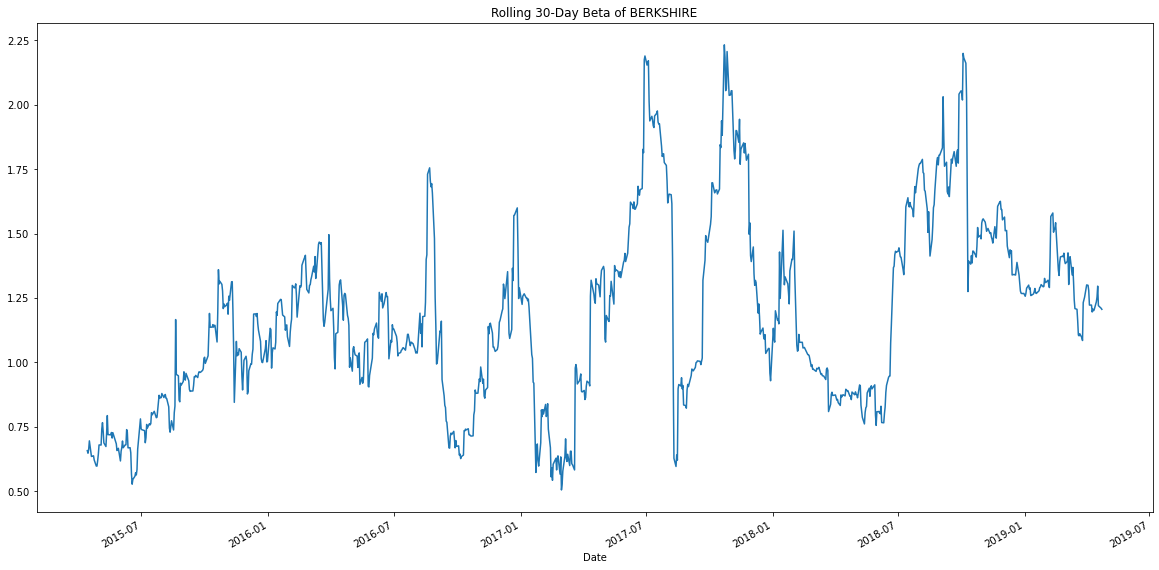

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = joined_data['BERKSHIRE HATHAWAY INC'].cov(joined_data['S&P 500'])
covariance 
variance = joined_data['S&P 500'].var()
variance
berkshire_beta = covariance/variance
berkshire_beta
rolling_covariance = joined_data['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(joined_data['S&P 500'])
rolling_variance = joined_data['S&P 500'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of BERKSHIRE')


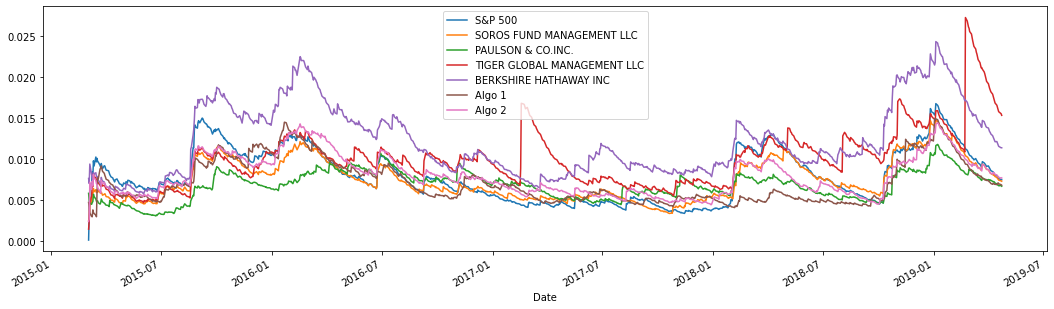

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
ewm_data = joined_data.ewm(halflife=21).std().plot(figsize=(18,5))


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
annualized_sharpe_ratios = (joined_data.mean() * 252) / (all_std_annual)
annualized_sharpe_ratios

S&P 500                        0.648267
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64

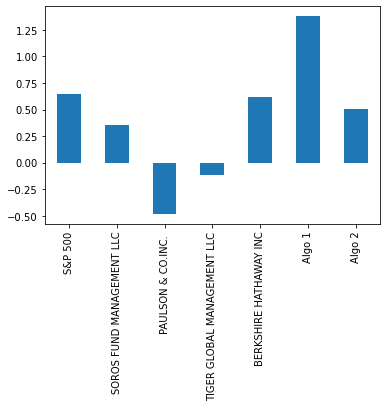

In [26]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind='bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: Yes. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
johnsonandjohnson_returns_csv = Path("./Resources/johnson_and_johnson.csv")
johnsonandjohnson_returns_data = pd.read_csv(johnsonandjohnson_returns_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
johnsonandjohnson_returns_data.index = johnsonandjohnson_returns_data.index.date
johnsonandjohnson_returns_data.columns.values[0] = "Johnson and Johnson"
johnsonandjohnson_returns_data.head()

,Johnson and Johnson
2012-10-01,69.13
2012-10-02,68.96
2012-10-03,69.00
2012-10-04,69.27
2012-10-05,69.65


In [28]:
# Read the second stock
merck_returns_csv = Path("./Resources/merck.csv")
merck_returns_data = pd.read_csv(merck_returns_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
merck_returns_data.index = merck_returns_data.index.date
merck_returns_data.columns.values[0] = "Merck"
merck_returns_data.head()

,Merck
2012-10-01,45.22
2012-10-02,45.47
2012-10-03,45.78
2012-10-04,46.12
2012-10-05,46.28


In [29]:
# Read the third stock
moderna_returns_csv = Path("./Resources/moderna.csv")
moderna_returns_data = pd.read_csv(moderna_returns_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
moderna_returns_data.index = moderna_returns_data.index.date
moderna_returns_data.columns.values[0] = "Moderna"
moderna_returns_data.head()

,Moderna
2018-12-07,18.60
2018-12-10,18.80
2018-12-11,18.01
2018-12-12,18.68
2018-12-13,18.76


In [30]:
# Read the fourth stock
novavax_returns_csv = Path("./Resources/novavax.csv")
novavax_returns_data = pd.read_csv(novavax_returns_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
novavax_returns_data.index = novavax_returns_data.index.date
novavax_returns_data.columns.values[0] = "Novavax"
novavax_returns_data.head()

,Novavax
2012-10-01,47.8
2012-10-02,47.0
2012-10-03,47.2
2012-10-04,47.2
2012-10-05,45.4


In [31]:
# Read the fifth stock
pfizer_returns_csv = Path("./Resources/pfizer.csv")
pfizer_returns_data = pd.read_csv(pfizer_returns_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
pfizer_returns_data.index = pfizer_returns_data.index.date
pfizer_returns_data.columns.values[0] = "Pfizer"
pfizer_returns_data.head()

,Pfizer
2012-10-01,25.04
2012-10-02,25.12
2012-10-03,25.32
2012-10-04,25.35
2012-10-05,25.52


In [32]:
# Concatenate all stocks into a single DataFrame
custom_data = pd.concat([johnsonandjohnson_returns_data, merck_returns_data, moderna_returns_data, novavax_returns_data, pfizer_returns_data], axis="columns", join="inner")
custom_data

,Johnson and Johnson,Merck,Moderna,Novavax,Pfizer
2018-12-07,145.43,76.72,18.60,41.00,43.92
2018-12-10,145.26,77.42,18.80,42.80,44.40
2018-12-11,146.50,77.11,18.01,44.60,44.01
2018-12-12,147.10,78.01,18.68,49.60,44.16
2018-12-13,147.84,79.01,18.76,46.00,44.57
...,...,...,...,...,...
2019-04-15,136.52,78.53,25.84,10.96,42.09
2019-04-16,138.02,77.56,23.78,10.96,40.92
2019-04-17,138.52,73.92,23.50,10.61,39.88
2019-04-18,137.52,73.19,22.51,10.43,39.38


In [33]:
# Reset the index
custom_data.reset_index(drop=True)
custom_data

,Johnson and Johnson,Merck,Moderna,Novavax,Pfizer
2018-12-07,145.43,76.72,18.60,41.00,43.92
2018-12-10,145.26,77.42,18.80,42.80,44.40
2018-12-11,146.50,77.11,18.01,44.60,44.01
2018-12-12,147.10,78.01,18.68,49.60,44.16
2018-12-13,147.84,79.01,18.76,46.00,44.57
...,...,...,...,...,...
2019-04-15,136.52,78.53,25.84,10.96,42.09
2019-04-16,138.02,77.56,23.78,10.96,40.92
2019-04-17,138.52,73.92,23.50,10.61,39.88
2019-04-18,137.52,73.19,22.51,10.43,39.38


In [34]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [35]:
# Drop Nulls
custom_data = custom_data.dropna()
custom_data

,Johnson and Johnson,Merck,Moderna,Novavax,Pfizer
2018-12-07,145.43,76.72,18.60,41.00,43.92
2018-12-10,145.26,77.42,18.80,42.80,44.40
2018-12-11,146.50,77.11,18.01,44.60,44.01
2018-12-12,147.10,78.01,18.68,49.60,44.16
2018-12-13,147.84,79.01,18.76,46.00,44.57
...,...,...,...,...,...
2019-04-15,136.52,78.53,25.84,10.96,42.09
2019-04-16,138.02,77.56,23.78,10.96,40.92
2019-04-17,138.52,73.92,23.50,10.61,39.88
2019-04-18,137.52,73.19,22.51,10.43,39.38


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Calculate weighted portfolio returns
custom_daily_returns = custom_data.pct_change()
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
custom_portfolio_returns = custom_daily_returns.dot(weights)
custom_portfolio_returns.dropna()

2018-12-10    0.014708
2018-12-11   -0.000843
2018-12-12    0.033697
2018-12-13   -0.008233
2018-12-14   -0.025061
                ...   
2019-04-15    0.013309
2019-04-16   -0.021777
2019-04-17   -0.022487
2019-04-18   -0.017745
2019-04-22    0.011793
Length: 91, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
comparison_data = pd.concat([custom_data, joined_data], axis="columns", join="inner")
comparison_data

,Johnson and Johnson,Merck,Moderna,Novavax,Pfizer,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
2018-12-07,145.43,76.72,18.60,41.00,43.92,-0.023320,-0.019902,-0.012730,-0.022698,-0.024372,0.003690,-0.015535
2018-12-10,145.26,77.42,18.80,42.80,44.40,0.001762,-0.009854,-0.004736,-0.007709,-0.002190,-0.016156,-0.004270
2018-12-11,146.50,77.11,18.01,44.60,44.01,-0.000356,-0.001686,-0.003164,0.000611,0.001262,-0.008391,-0.002542
2018-12-12,147.10,78.01,18.68,49.60,44.16,0.005419,0.009128,0.008147,0.002798,0.017475,0.002048,0.006321
2018-12-13,147.84,79.01,18.76,46.00,44.57,-0.000200,-0.006231,-0.005056,0.000476,-0.004340,-0.012556,-0.010408
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-15,136.52,78.53,25.84,10.96,42.09,-0.000629,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572
2019-04-16,138.02,77.56,23.78,10.96,40.92,0.000509,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,138.52,73.92,23.50,10.61,39.88,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-18,137.52,73.19,22.51,10.43,39.38,0.001579,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
comparison_data = comparison_data.dropna()
comparison_data.head()


,Johnson and Johnson,Merck,Moderna,Novavax,Pfizer,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
2018-12-07,145.43,76.72,18.60,41.0,43.92,-0.023320,-0.019902,-0.012730,-0.022698,-0.024372,0.003690,-0.015535
2018-12-10,145.26,77.42,18.80,42.8,44.40,0.001762,-0.009854,-0.004736,-0.007709,-0.002190,-0.016156,-0.004270
2018-12-11,146.50,77.11,18.01,44.6,44.01,-0.000356,-0.001686,-0.003164,0.000611,0.001262,-0.008391,-0.002542
2018-12-12,147.10,78.01,18.68,49.6,44.16,0.005419,0.009128,0.008147,0.002798,0.017475,0.002048,0.006321
2018-12-13,147.84,79.01,18.76,46.0,44.57,-0.000200,-0.006231,-0.005056,0.000476,-0.004340,-0.012556,-0.010408


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [39]:
# Risk
comparison_std = comparison_data.std()
comparison_std.gt(comparison_std.loc["S&P 500"])
comparison_std

comparison_std_annual = comparison_data.std() * np.sqrt(252)
comparison_std_annual

comparison_std > (comparison_std["S&P 500"])

Johnson and Johnson             True
Merck                           True
Moderna                         True
Novavax                         True
Pfizer                          True
S&P 500                        False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
dtype: bool

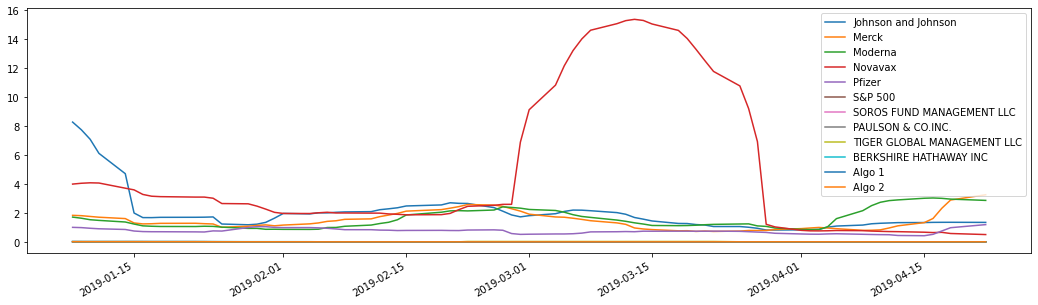

In [40]:
# Rolling
comparison_data.rolling(window=21).std().plot(figsize=(18,5))

In [41]:
# Annualized Sharpe Ratios
comparison_sharpe_ratios = (comparison_data.mean() * 252) / (comparison_std_annual)
comparison_sharpe_ratios

Johnson and Johnson            417.538368
Merck                          374.275460
Moderna                         91.917548
Novavax                         30.431195
Pfizer                         668.359083
S&P 500                          1.302104
SOROS FUND MANAGEMENT LLC        1.714854
PAULSON & CO.INC.                0.257913
TIGER GLOBAL MANAGEMENT LLC     -1.489691
BERKSHIRE HATHAWAY INC           2.016956
Algo 1                           1.658211
Algo 2                           1.657343
dtype: float64

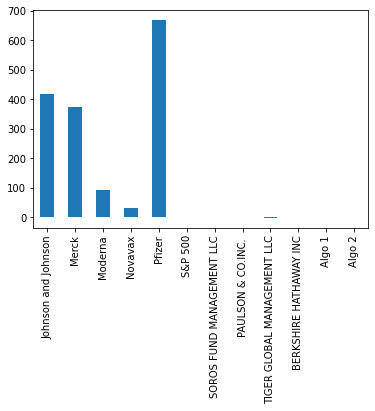

In [42]:
# Visualize the sharpe ratios as a bar plot
comparison_sharpe_ratios.plot(kind='bar')

In [43]:
# Create a correlation analysis
comparison_correlation = comparison_data.corr()
comparison_correlation.head(7)

,Johnson and Johnson,Merck,Moderna,Novavax,Pfizer,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Johnson and Johnson,1.000000,0.665923,0.606277,-0.476422,0.212946,0.013518,-0.095659,-0.078943,-0.065044,-0.018339,-0.225514,-0.079551
Merck,0.665923,1.000000,0.648435,-0.662756,0.276013,0.109537,0.027013,0.068550,-0.027541,0.048633,0.042716,0.092766
Moderna,0.606277,0.648435,1.000000,-0.693544,-0.001345,0.010355,-0.029321,-0.014852,-0.027921,-0.031484,-0.120875,-0.017730
Novavax,-0.476422,-0.662756,-0.693544,1.000000,0.259614,-0.002236,0.030736,-0.002098,-0.072312,0.051060,0.045096,0.018504
Pfizer,0.212946,0.276013,-0.001345,0.259614,1.000000,0.083672,0.060966,0.118842,-0.025191,0.088554,0.153428,0.078787
S&P 500,0.013518,0.109537,0.010355,-0.002236,0.083672,1.000000,0.879857,0.778687,0.418110,0.906276,0.316594,0.872464
SOROS FUND MANAGEMENT LLC,-0.095659,0.027013,-0.029321,0.030736,0.060966,0.879857,1.000000,0.830206,0.479675,0.840762,0.374399,0.870515


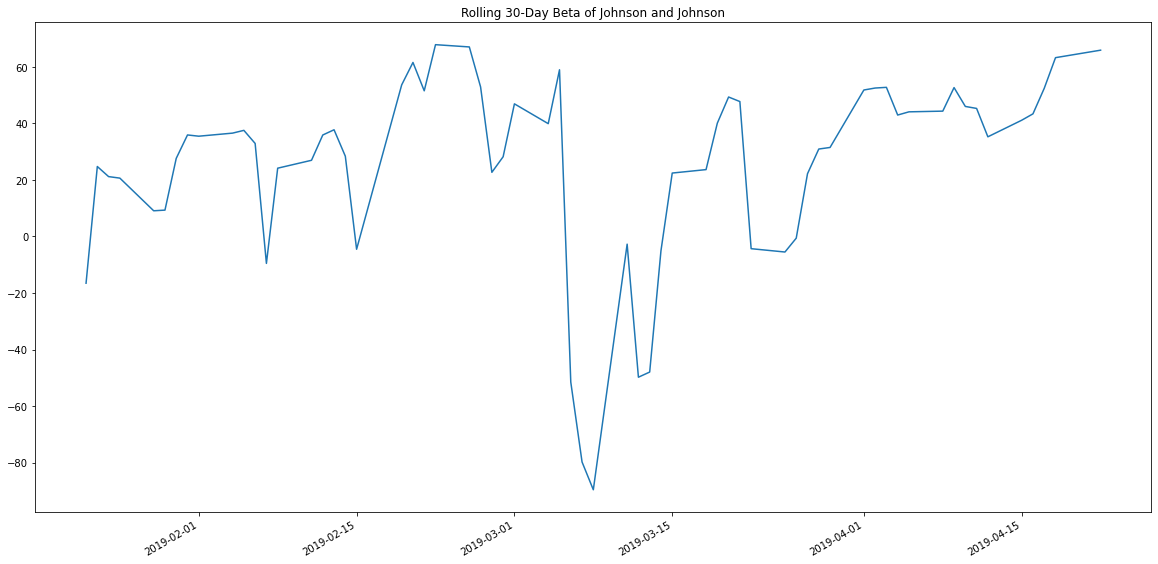

In [44]:
# Beta
comparison_covariance = comparison_data['Johnson and Johnson'].cov(comparison_data['S&P 500'])
comparison_covariance 
comparison_variance = comparison_data['S&P 500'].var()
comparison_variance
jandj_beta = comparison_covariance/comparison_variance
jandj_beta
comparison_rolling_covariance = comparison_data['Johnson and Johnson'].rolling(window=30).cov(comparison_data['S&P 500'])
comparison_rolling_variance = comparison_data['S&P 500'].rolling(window=30).var()
comparison_rolling_beta = comparison_rolling_covariance / comparison_rolling_variance
comparison_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Johnson and Johnson')